In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
%matplotlib inline

df = pd.read_csv('/content/drive/MyDrive/Augmented_Defect_Report_Jan05xlsx_Sheet1.csv')
df = df[pd.notnull(df['Category 1'])]
print(df.head(10))
print(df['Issue Summary'].apply(lambda x: len(x.split(' '))).sum())

                                       Issue Summary  \
0  Buttons size are not proper on Confirmation Page.   
1   Top label Spacing margin - Payment Instrument...   
2  [Mobile App] Keypad should be numeric when use...   
3  Incorrect Monetary value is getting displayed ...   
4  Credit Value and Progress bar is not proper on...   
5  After entering invalid member Mobile numner, g...   
6  Getting "Data not found" when user tries to op...   
7  Filter is not working properly on the Goal His...   
8  After click on Paid by All, the status automat...   
9  Error message is not correct for already added...   

                     Category 1  Category 2  
0             Confirmation Page          UI  
1            Payment instrument          UI  
2                        Keypad  Functional  
3                   Buy voucher  Functional  
4                          BNPL          UI  
5  invalid member Mobile Number  Functional  
6            Payment status tab  Functional  
7             G

In [ ]:
print(df['Issue Summary'].count())

2504


In [ ]:
def print_plot(index):
    example = df[df.index == index][['Issue Summary', 'Category 1']].values[0]
    if len(example) > 0:
        print(example[0])
        print('Tag:', example[1])
print_plot(10)

Error message is not correct for already added group
Tag: already added group


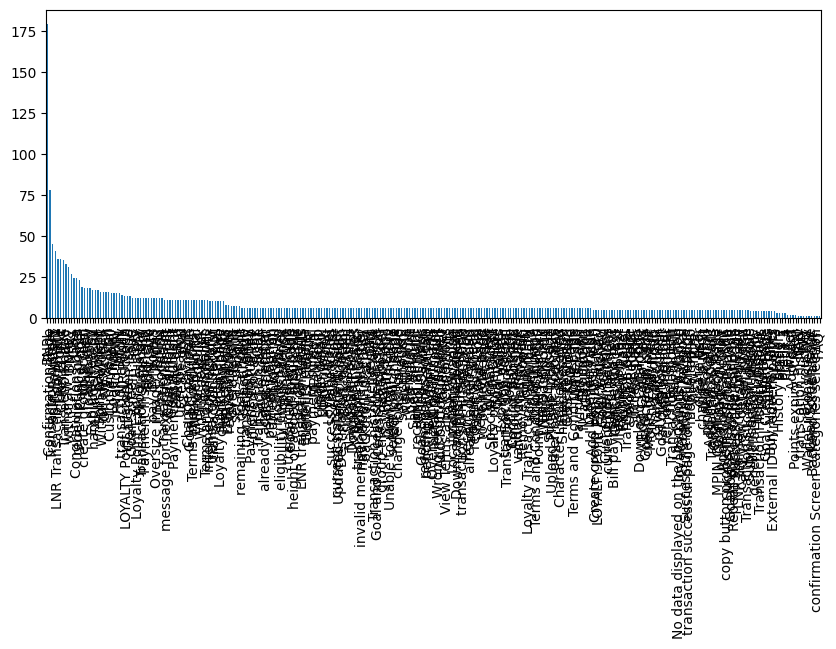

In [ ]:
my_tags = ['Functional','UI'
]


plt.figure(figsize=(10,4))
df['Category 1'].value_counts().plot(kind='bar');

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string

        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

df['Issue Summary'] = df['Issue Summary'].apply(clean_text)
print_plot(10)

<ipython-input-8-8885e339c94a>:11: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text # HTML decoding


error message correct already added group
Tag: already added group


In [ ]:
df['Issue Summary'].apply(lambda x: len(x.split(' '))).sum()

31539

Category 2 classification

In [ ]:
X = df['Issue Summary']
y2 = df['Category 2']

X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=0.7, random_state = 42)

USING SDG

In [ ]:
# svm

from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=20, tol=None)),
               ])
sgd.fit(X_train, y_train)


y_predcat2 = sgd.predict(X_test)
print(y_test)
print(y_predcat2)



print('accuracy %s' % accuracy_score(y_predcat2, y_test))


1835    Functional
252             UI
1594    Functional
430     Functional
1356    Functional
           ...    
125     Functional
204             UI
1473            UI
52      Functional
545     Functional
Name: Category 2, Length: 1753, dtype: object
['Functional' 'UI' 'UI' ... 'Functional' 'Functional' 'Functional']
accuracy 0.8750713063320023


In [ ]:
issue_summaries = df['Issue Summary']
d = {
    "Issue Summary": X_test,
    "Category 2": y_predcat2
}
print(d)

{'Issue Summary': 1835    issue arises users experience adapter timeouts...
252        ui element group detail doesnt match wireframe
1594    opposite navigation points impede user navigat...
430                        user able make p2p mobifin web
1356    realtime updates lnr profile occur expected ne...
                              ...                        
125                app crashing clicking switch list view
204     transaction history list view red cross displa...
1473    despite reaching maximum limit gbs users recei...
52      external id displaying transaction summary pag...
545     despite encountering error message uploading i...
Name: Issue Summary, Length: 1753, dtype: object, 'Category 2': array(['Functional', 'UI', 'UI', ..., 'Functional', 'Functional',
       'Functional'], dtype='<U10')}


In [ ]:
finalresult=pd.DataFrame(data=d)
print(d)

{'Issue Summary': 1835    issue arises users experience adapter timeouts...
252        ui element group detail doesnt match wireframe
1594    opposite navigation points impede user navigat...
430                        user able make p2p mobifin web
1356    realtime updates lnr profile occur expected ne...
                              ...                        
125                app crashing clicking switch list view
204     transaction history list view red cross displa...
1473    despite reaching maximum limit gbs users recei...
52      external id displaying transaction summary pag...
545     despite encountering error message uploading i...
Name: Issue Summary, Length: 1753, dtype: object, 'Category 2': array(['Functional', 'UI', 'UI', ..., 'Functional', 'Functional',
       'Functional'], dtype='<U10')}


In [ ]:
pip install joblib

In [ ]:
import joblib

# Assuming 'sgd' is your trained SGDClassifier model

# Specify the file path where you want to save the model
model_file_path = 'sgd_category2.pkl'

# Save the model to the specified file path
joblib.dump(sgd, model_file_path)

print("Model saved successfully to:", model_file_path)


Model saved successfully to: sgd_category2.pkl


EXTRA MODELS WE TRIED


Using Random forest for category 1 accuracy

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Define the pipeline
# rf_pipeline = Pipeline([
#     ('vect', CountVectorizer()),       # Convert text to word frequency vectors
#     ('tfidf', TfidfTransformer()),     # Apply TF-IDF transformation
#     ('clf', RandomForestClassifier(n_estimators=100, random_state=42)),  # Random Forest classifier
# ])

# # Train the pipeline
# rf_pipeline.fit(X_train, y_train)

# # Predict on the test set
# y_pred_rf = rf_pipeline.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_pred_rf, y_test)
# print('Random Forest accuracy:', accuracy)
# print(y_test)
# print(y_pred)
# print('accuracy %s' % accuracy_score(y_pred_rf, y_test))


Random Forest accuracy: 0.6486023958927553
1835                  Monthly payment
252                     group detail 
1594                Navigation points
430                               P2P
1356                      LNR Profile
                    ...              
125                         List view
204     Transaction history list view
1473                              GBS
52           transaction summary page
545             Oversize image upload
Name: Category 1, Length: 1753, dtype: object
['Monthly payment' 'Loyalty profile Detail' 'Navigation points' ... 'GBS'
 'transaction summary page' 'Oversize image upload']
accuracy 0.6486023958927553


Using Random Forest for category 2 accuracy

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import accuracy_score

# # Define the pipeline
# rf_pipeline = Pipeline([
#     ('vect', CountVectorizer()),       # Convert text to word frequency vectors
#     ('tfidf', TfidfTransformer()),     # Apply TF-IDF transformation
#     ('clf', RandomForestClassifier(n_estimators=100, random_state=42)),  # Random Forest classifier
# ])

# # Train the pipeline
# rf_pipeline.fit(X_train, y_train)

# # Predict on the test set
# y_pred_rf = rf_pipeline.predict(X_test)

# # Evaluate the accuracy
# accuracy = accuracy_score(y_pred_rf, y_test)
# print('Random Forest accuracy:', accuracy)
# print(y_test)
# print(y_pred)
# print('accuracy %s' % accuracy_score(y_pred_rf, y_test))


Random Forest accuracy: 0.8573873359954364
1835    Functional
252             UI
1594    Functional
430     Functional
1356    Functional
           ...    
125     Functional
204             UI
1473            UI
52      Functional
545     Functional
Name: Category 2, Length: 1753, dtype: object
['Functional' 'UI' 'UI' ... 'Functional' 'Functional' 'Functional']
accuracy 0.8573873359954364
